In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from pandas.plotting import parallel_coordinates


In [10]:
df = pd.read_csv(
    "adult.data",
    names = [
        "age",
        "workclass",
        "fnlwgt",
        "education",
        "education_num",
        "marital_status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "capital_gain",
        "capital_loss",
        "hours_per_week",
        "native_country",
        "amount"
    ],
    delimiter=",",
    index_col=False
)

names = [
        "age",
        "workclass",
        "education",
        "marital_status",
        "occupation",
        "relationship",
        "race",
        "sex",
        "hours_per_week",
        "native_country"
    ]

df['workclass'] = pd.Categorical(df['workclass'])
df['workclass'] = df.workclass.cat.codes
df['marital_status'] = pd.Categorical(df['marital_status'])
df['marital_status'] = df.marital_status.cat.codes
df['education'] = pd.Categorical(df['education'])
df['education'] = df.education.cat.codes
df['occupation'] = pd.Categorical(df['occupation'])
df['occupation'] = df.occupation.cat.codes
df['relationship'] = pd.Categorical(df['relationship'])
df['relationship'] = df.relationship.cat.codes
df['race'] = pd.Categorical(df['race'])
df['race'] = df.race.cat.codes
df['sex'] = pd.Categorical(df['sex'])
df['sex'] = df.sex.cat.codes
df['native_country'] = pd.Categorical(df['native_country'])
df['native_country'] = df.native_country.cat.codes
df = df.drop(columns=['fnlwgt'])
df = df.drop(columns=['capital_gain'])
df = df.drop(columns=['capital_loss'])
df = df.drop(columns=['education_num'])
df = df.drop(columns=['amount'])

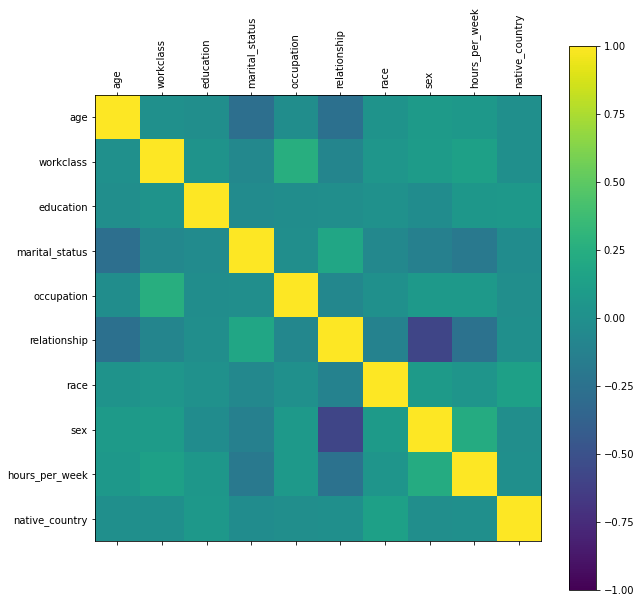

In [11]:
correlations = df.corr()
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,10,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.xticks(rotation = 90)
plt.show()

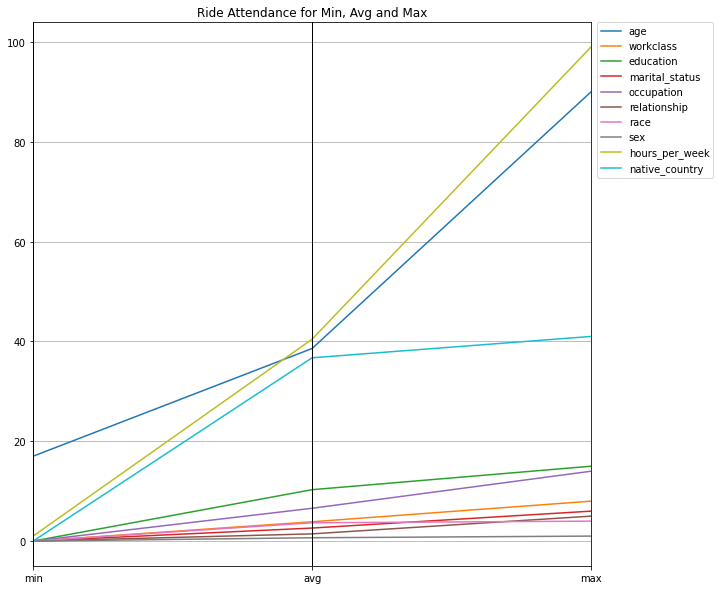

In [13]:
max = df.max()
min = df.min()
avg = df.mean()

plot_df = pd.DataFrame({ 'max': max, 'min': min, 'avg': avg })
plot_df['id'] = plot_df.index

fig, ax = plt.subplots(figsize =(10, 10))
fig.patch.set_facecolor('white')
ax.set_title('Ride Attendance for Min, Avg and Max')

parallel_coordinates(plot_df[['id', 'min', 'avg', 'max']], 'id', colormap='tab10')

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.)

plt.show()
